<a href="https://colab.research.google.com/github/Eugene31415/Pet-Projects/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)


11493376/11490434 [==============================] - 0s 0us/step


# Сжимающий автоэнкодер

In [ ]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    encoding_dim = 49

    input_img = Input(shape=(28,28,1))
    flat_img = Flatten()(input_img)
    encoded = Dense(encoding_dim, activation='relu')(flat_img)

    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28,28,1))(flat_decoded)

    encoder = Model(input_img, encoded, name='encoder')
    decoder = Model(input_encoded, decoded, name='decoder')
    autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')
    return encoder, decoder, autoencoder


In [ ]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                38465     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])

    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

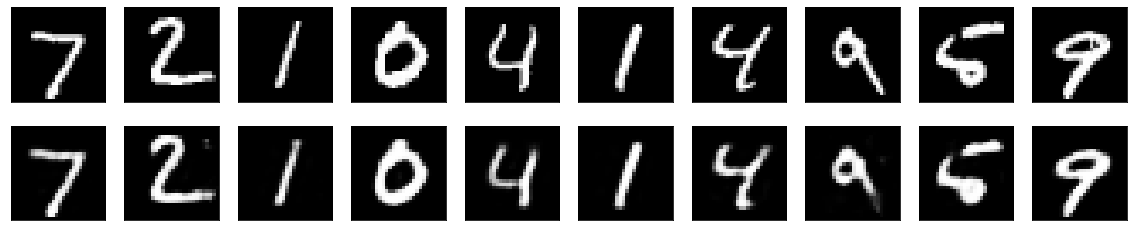

In [ ]:
n = 10

imgs = x_test[:n]

encoded_imgs = encoder.predict(imgs, batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

#Глубокий Автоэнкодер

In [ ]:
def create_deep_dense_ae():
    encoding_dim = 49

    input_img = Input(shape=(28,28,1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)

    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28,28,1))(flat_decoded)

    encoder = Model(input_img, encoded, name='encoder')
    decoder = Model(input_encoded, decoded, name='decoder')
    autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')

    return encoder, decoder, autoencoder


In [ ]:
d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                134750    
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         135485    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [ ]:
d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test,x_test))

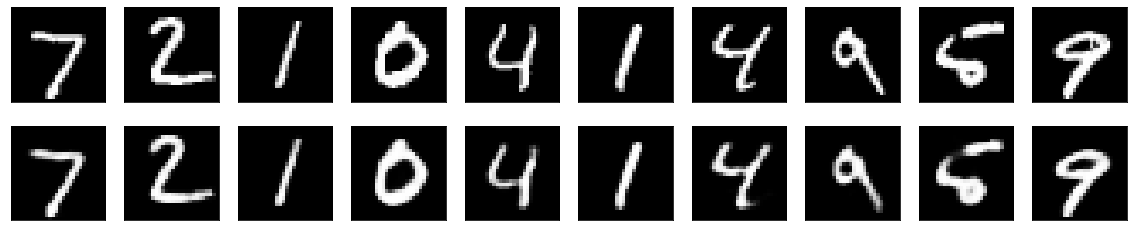

In [ ]:
n = 10

imgs = x_test[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

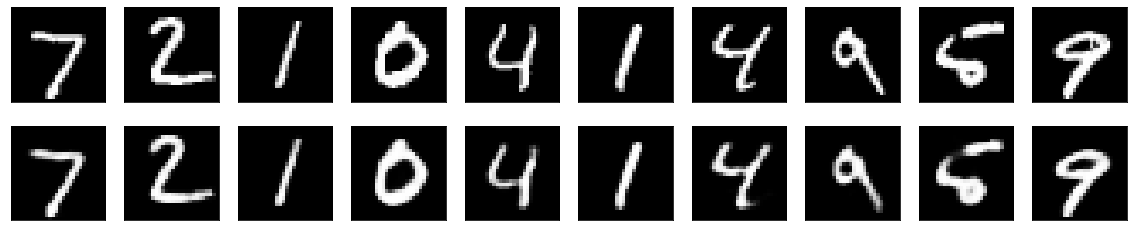

In [ ]:
new_imgs = d_autoencoder.predict(imgs, batch_size=n)
plot_digits(imgs, new_imgs)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_deep_conv_ae():
    input_img = Input(shape=(28,28,1))
    x = Conv2D(128, (7,7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(32, (2,2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), padding='same')(x)
    encoded = Conv2D(1, (7,7), activation='relu', padding='same')(x)

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    encoder = Model(input_img, encoded, name='encoder')
    decoder = Model(input_encoded, decoded, name='decoder')
    autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')

    return encoder, decoder, autoencoder


In [ ]:
c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
c_autoencoder.fit(x_train, x_train,
                epochs=64,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

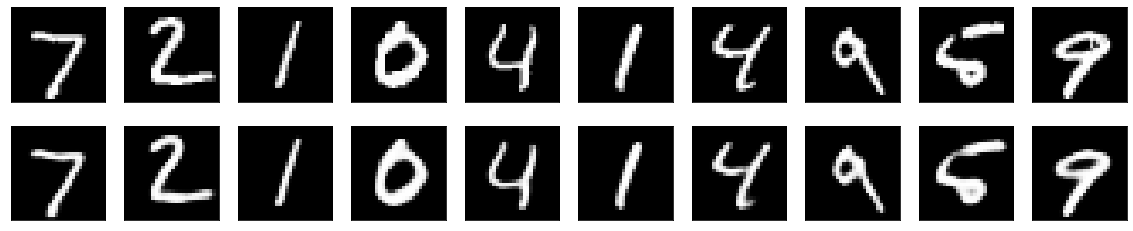

In [ ]:
n = 10

imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

В Keras можно оборачивать произвольные операции из нижележащего фреймворка в Lambda слой. Обращаться к операциям из tensorflow или theano можно через модуль backend.


In [ ]:
import keras.backend as K
from keras.layers import Lambda

batch_size = 16

def create_denoising_model(autoencoder):
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x,0., 1.)
        return x

    input_img = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)

    noiser = Model(input_img, noised_img, name='noiser')
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name='denoiser')

    return noiser, denoiser_model

In [ ]:
noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
denoiser_model.summary()

Model: "denoiser"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(16, 28, 28, 1)]         0         
_________________________________________________________________
noiser (Functional)          (16, 28, 28, 1)           0         
_________________________________________________________________
autoencoder (Functional)     (None, 28, 28, 1)         77665     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
denoiser_model.fit(x_train, x_train,
                   epochs=200,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

Epoch 1/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2280 - val_loss: 0.1537
Epoch 2/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1525 - val_loss: 0.1441
Epoch 3/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1449 - val_loss: 0.1418
Epoch 4/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1440 - val_loss: 0.1419
Epoch 5/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1433 - val_loss: 0.1410
Epoch 6/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1432 - val_loss: 0.1423
Epoch 7/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1432 - val_loss: 0.1410
Epoch 8/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1428 - val_loss: 0.1406
Epoch 9/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1430 - val_loss: 0.1410
Epoch 10/200
3750/3750 [==============================] - 7s 2ms/step - l

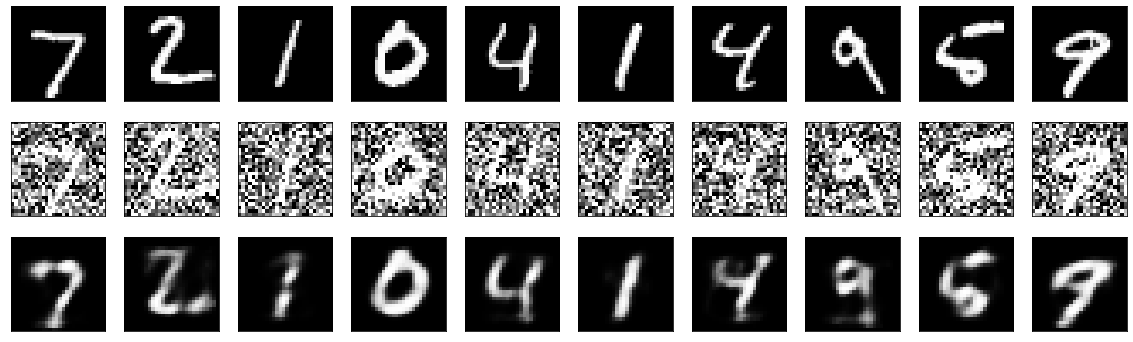

In [ ]:
n = 10

imgs = x_test[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n],  batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)

plot_digits(imgs[:n], noised_imgs, decoded_imgs)

In [ ]:
from keras.regularizers import L1L2

def create_sparse_ae():
    encoding_dim = 16
    lambda_l1 = 0.00001
    
    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    
    return encoder, decoder, autoencoder

In [ ]:
s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
s_autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

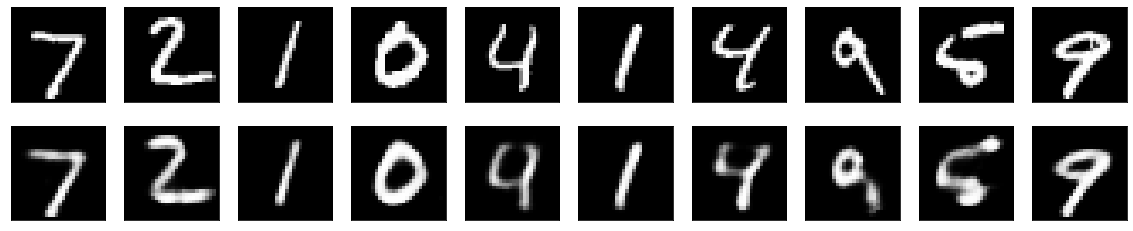

In [ ]:
n = 10

imgs = x_test[:n]

encoded_imgs = s_encoder.predict(imgs, batch_size=n)
decoded_imgs = s_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)